In [1]:
!pip install spectral

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [52]:
!pip install spectres

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd

In [22]:
from spectres import spectres
from scipy.optimize import curve_fit

# Loading the hdr and img file from the first observations data

In [6]:
from spectral import *
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import constants


h = constants.h
c = constants.c
e = math.e
pi = math.pi
k = constants.k

def load_flux(fluxname):

    with open(fluxname, 'r') as file:
        data = file.readlines()
        #print(data)
        size = len(data)
        #print(size)
        flux = np.zeros(size)
        wavelengths = np.zeros(size)
        for i in range(size):
            flux[i]=(float(data[i].strip().split(" ,")[1]))
            wavelengths[i]=(float(data[i].strip().split(",")[0]))

    return flux,wavelengths

def rad_list(xp,yp):
    rad = np.zeros(len(wavelengths))
    for i in range(len(wavelengths)):
        rad[i] = img_open[xp,yp,i+5]
   
# Load solar flux
flux, wavelengths = load_flux('/home/ritabik/Desktop/Guneshwar/m3_solarflux.txt')
wavelengths = wavelengths[:85] #in nanometer
wavelengths = np.array(wavelengths)
wavelengths = wavelengths/1000

#load image file
img = envi.open('/home/ritabik/Desktop/Guneshwar/Observation_data/m3g20081129t052459_v03_obs.hdr')
# Data in 3D-array 
img_open = img.open_memmap(writeable = False)


def plot(x,y):
    # Radiance
    rad = img_open[x,y,:]
    #plt.plot(np.arange(0,85,1), rad)
    ################### Reflectance #######################
    ref = rad*pi/flux  #distance is taken as 1AU
    plt.plot(wavelengths,ref)
    
def scatter(x,y):
    # Radiance
    rad = img_open[x,y,:85]
    plt.scatter(wavelengths, rad, marker='x')
img_data = np.array(img_open)
img_data.shape

(6203, 304, 10)

# Checking the metadata of the observations files to extract the cosi and phase angles

In [21]:
import pandas as pd

# Assuming band_names contains the metadata for the column headers
band_names = ['To-Sun Azimuth (deg)', 'To-Sun Zenith (deg)', 'To-M3 Azimuth (deg)', 'To-M3 Zenith (deg)', 'Phase (deg)', 'To-Sun Path Length (au-0.983752357517)', 'To-M3 Path Length (m)', 'Facet Slope (deg)', 'Facet Aspect (deg)', 'Facet Cos(i) (unitless)']

# Assuming img_open is your NumPy array with shape (6203, 304, 10)

# Reshape the 3D array into a 2D array
reshaped_array = img_open.reshape(-1, img_open.shape[-1])  # Shape will be (6203*304, 10)

# Convert the reshaped array into a DataFrame
df = pd.DataFrame(reshaped_array)

# Set column names using the band_names list
df.columns = band_names

# Now, df is your Pandas DataFrame with column headers matching the metadata
df


,To-Sun Azimuth (deg),To-Sun Zenith (deg),To-M3 Azimuth (deg),To-M3 Zenith (deg),Phase (deg),To-Sun Path Length (au-0.983752357517),To-M3 Path Length (m),Facet Slope (deg),Facet Aspect (deg),Facet Cos(i) (unitless)
0,327.029938,31.568523,94.403175,12.044732,39.919647,-0.000002,109976.437500,6.901509,129.790421,0.785760
1,327.019501,31.571398,94.440247,11.962020,39.865868,-0.000002,109891.406250,6.635164,129.635040,0.788550
2,327.010773,31.573721,94.478210,11.880224,39.812134,-0.000002,109939.609375,6.414959,129.479218,0.790850
3,327.001160,31.576336,94.516319,11.797951,39.758446,-0.000002,109917.718750,6.200145,129.244995,0.793100
4,326.991577,31.578941,94.554848,11.715703,39.704803,-0.000002,109899.015625,6.001007,128.965256,0.795191
...,...,...,...,...,...,...,...,...,...,...
1885707,339.564850,61.050247,269.160034,12.640997,57.552139,0.000002,107063.148438,10.764750,326.875366,0.634971
1885708,339.554016,61.052273,269.188660,12.723050,57.528103,0.000002,107069.679688,10.129975,333.709137,0.629574
1885709,339.542725,61.054367,269.216614,12.805295,57.504101,0.000002,107102.328125,9.679012,342.820862,0.623975
1885710,339.531708,61.056423,269.244476,12.887414,57.480129,0.000002,107117.429688,9.472141,351.819702,0.618064


In [17]:
metadata = envi.read_envi_header('/home/ritabik/Desktop/Guneshwar/Observation_data/m3g20081129t052459_v03_obs.hdr')


# Convert the metadata dictionary to a DataFrame
metadata_df = pd.DataFrame.from_dict(metadata, orient='index', columns=['Value'])
band_names = metadata_df.loc['band names', 'Value']
# Display the metadata DataFrame
print(band_names)


['To-Sun Azimuth (deg)', 'To-Sun Zenith (deg)', 'To-M3 Azimuth (deg)', 'To-M3 Zenith (deg)', 'Phase (deg)', 'To-Sun Path Length (au-0.983752357517)', 'To-M3 Path Length (m)', 'Facet Slope (deg)', 'Facet Aspect (deg)', 'Facet Cos(i) (unitless)']


# Loading the first radiance file

In [7]:
import numpy as np

# Load data from .npy file
data = np.load('/home/ritabik/Desktop/Guneshwar/radiance_data/corr_i_m3g20081129t052459_v03_rdn.npy')

# Now you can use the loaded data as a numpy array
print(data.shape)

(6203, 304, 85)


# Extracting the flux and wavelength data from the solar flux datasets

In [8]:
flux, wavelengths = load_flux('/home/ritabik/Desktop/Guneshwar/m3_solarflux.txt')
wavelengths = wavelengths[:85] #in nanometer
wavelengths = np.array(wavelengths)
wavelengths = wavelengths
flux.shape

(85,)

# Correcting the radiance by diving the solar flux

In [9]:
data1 = np.empty(data.shape)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            corr = data[i, j, k] / flux[k]  # Calculate the corrected value
            data1[i, j, k] = corr  # Assign the corrected value to the corresponding index in 'data1'

data1[0,0]

array([-0.00878977,  0.01017987,  0.02236512,  0.00661687,  0.00452484,
        0.00129936,  0.00732037,  0.00754459,  0.00895848,  0.00777797,
        0.00709931,  0.00599089,  0.00478418,  0.00506103,  0.00473947,
        0.00397023,  0.00554661,  0.00651556,  0.00849222,  0.01017762,
        0.01138789,  0.01304035,  0.01372418,  0.01511172,  0.01627436,
        0.01705237,  0.01781256,  0.01827303,  0.01878891,  0.01918385,
        0.02244039,  0.02044985,  0.02154182,  0.02262089,  0.02409478,
        0.02585453,  0.02639894,  0.02772465,  0.02894777,  0.03035203,
        0.03122387,  0.03211153,  0.03327863,  0.03377464,  0.03364528,
        0.03446821,  0.03524276,  0.0349565 ,  0.03456563,  0.03517506,
        0.03659266,  0.03674819,  0.03775977,  0.03869101,  0.0386095 ,
        0.03984258,  0.04015853,  0.04052964,  0.04105705,  0.0416968 ,
        0.0419802 ,  0.04325657,  0.04384089,  0.04475033,  0.04501173,
        0.04635243,  0.04637764,  0.04723714,  0.0495632 ,  0.05

In [28]:
data1.shape

(6203, 304, 85)

# Example plot of I/F vs wavelengths of 1st array

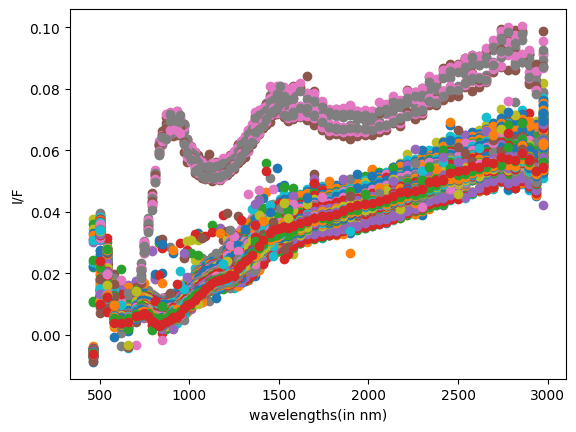

In [10]:
for i in range(len(data[0])):
    plt.scatter(wavelengths,data1[0,i])
plt.xlabel('wavelengths(in nm)')
plt.ylabel('I/F')
plt.show()

# Extracting the cosi and phase angles from the img data

In [11]:
angles_phase = np.empty(img_data.shape[:-1])
angles_cosi = np.empty(img_data.shape[:-1])

for i in range(len(img_data)):
    for j in range(len(img_data[i])):
        for k in range(len(img_data[i,j])):
            angles_phase[i,j] = img_data[i,j,4]
            angles_cosi[i,j] = img_data[i,j,9]

# Reshape angles_phase and angles_cosi to have a third dimension of size 1
angles_phase = angles_phase.reshape((angles_phase.shape[0], angles_phase.shape[1], 1))
angles_cosi = angles_cosi.reshape((angles_cosi.shape[0], angles_cosi.shape[1], 1))

print(angles_phase.shape)
print(angles_cosi.shape)

(6203, 304, 1)
(6203, 304, 1)


In [12]:
# Extract the I/F values for the 45th band of all samples
data2 = data1[:, :, 44].reshape(-1)
data2


array([0.03364528, 0.03753316, 0.03324306, ..., 0.02982248, 0.02840652,
       0.02837837])

In [14]:
phase_angle_ = angles_phase.reshape(1,-1)
phase_angle_ = np.squeeze(phase_angle_)

phase_angle_.shape

(1885712,)

In [16]:
cosi_angle = angles_cosi.reshape(1,-1)
cosi_angle = np.squeeze(cosi_angle)

cosi_angle.shape

(1885712,)

# Binning of the radiance and phase angle data

In [18]:
# Define phase angle bin ra# Minimum and maximum phase angle values
min_angle = np.min(phase_angle_)
max_angle = np.max(phase_angle_)
num_bins = 100

# Calculate the bin width
bin_width = (max_angle - min_angle) / num_bins

# Create bin ranges
bin_ranges = [(min_angle + i * bin_width, min_angle + (i + 1) * bin_width) for i in range(num_bins)]

binned_reflectance = np.zeros(len(bin_ranges))
binned_cosi = np.zeros(len(bin_ranges))
bin_counts = np.zeros(len(bin_ranges), dtype=int)

# Bin the reflectance data based on phase angles
for i, bin_range in enumerate(bin_ranges):
    lower_bound, upper_bound = bin_range
    bin_reflectance = []
    bin_cosi = []
   
    # Loop through phase angles and reflectance values
    for angle1,angle2,reflectance in zip(phase_angle_,cosi_angle, data2):
        if lower_bound <= angle1 < upper_bound:
            bin_reflectance.append(reflectance)
            bin_cosi.append(angle2)
   
    # Calculate average reflectance and count
    if bin_reflectance:
        binned_reflectance[i] = np.mean(bin_reflectance)
        bin_counts[i] = len(bin_reflectance)
        
    if bin_cosi:
        binned_cosi[i] = np.mean(bin_cosi)
        bin_counts[i] = len(bin_cosi)
        
# Print average reflectance and counts for each bin
for i, bin_range in enumerate(bin_ranges):
    print(f"Bin {i+1}: {bin_range},Average cosi: {binned_cosi[i]} ,Average Reflectance: {binned_reflectance[i]:.4f}, Data Points: {bin_counts[i]}")



Bin 1: (26.90259552001953, 27.291571350097655),Average cosi: 0.841395731503821 ,Average Reflectance: 0.0336, Data Points: 619
Bin 2: (27.291571350097655, 27.680547180175783),Average cosi: 0.8377634539495625 ,Average Reflectance: 0.0353, Data Points: 1713
Bin 3: (27.680547180175783, 28.069523010253906),Average cosi: 0.8395331094219703 ,Average Reflectance: 0.0366, Data Points: 2738
Bin 4: (28.069523010253906, 28.45849884033203),Average cosi: 0.8386513401794997 ,Average Reflectance: 0.0387, Data Points: 3721
Bin 5: (28.45849884033203, 28.847474670410158),Average cosi: 0.843752176431981 ,Average Reflectance: 0.0417, Data Points: 4665
Bin 6: (28.847474670410158, 29.23645050048828),Average cosi: 0.846141006208856 ,Average Reflectance: 0.0430, Data Points: 5575
Bin 7: (29.23645050048828, 29.625426330566405),Average cosi: 0.8396552783935888 ,Average Reflectance: 0.0441, Data Points: 6447
Bin 8: (29.625426330566405, 30.01440216064453),Average cosi: 0.8256375235188094 ,Average Reflectance: 0.04

In [19]:
phase_angles = []
for bins in bin_ranges:
    average = np.mean(bins)
    phase_angles.append(average)
len(phase_angles),len(binned_reflectance),len(binned_cosi)

(100, 100, 100)

In [43]:
binned_reflectance

array([0.03362296, 0.03530594, 0.03661518, 0.03868598, 0.04173958,
       0.04302962, 0.04405259, 0.04520205, 0.04637377, 0.04629078,
       0.045259  , 0.04471156, 0.04473936, 0.04466071, 0.04434276,
       0.04378442, 0.0437194 , 0.04269322, 0.04149886, 0.04070871,
       0.03986093, 0.03895993, 0.03825619, 0.03798539, 0.03776123,
       0.03768737, 0.03742868, 0.0370482 , 0.03722889, 0.03728913,
       0.03704393, 0.03653032, 0.0360565 , 0.03592426, 0.03605168,
       0.03627536, 0.03644345, 0.03623142, 0.0360276 , 0.03589805,
       0.03557479, 0.03539957, 0.03563281, 0.03538348, 0.035201  ,
       0.03505332, 0.03440382, 0.03452398, 0.03463257, 0.03488444,
       0.03492032, 0.03472069, 0.03482912, 0.03466229, 0.03447465,
       0.03430349, 0.03415612, 0.03392374, 0.03400352, 0.03354429,
       0.03314052, 0.03255738, 0.03208207, 0.03165425, 0.03158166,
       0.03130427, 0.03097127, 0.03098001, 0.03086636, 0.03024598,
       0.02945352, 0.02913173, 0.0285762 , 0.02837844, 0.02814

# Plotting all the binned radiance datas w.r.t phase angles

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


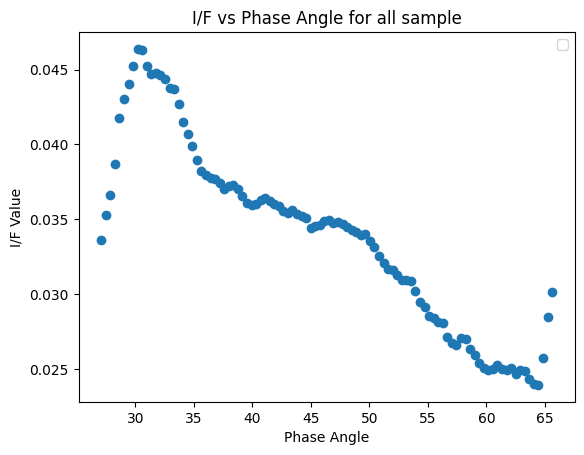

In [50]:
import matplotlib.pyplot as plt

plt.scatter(phase_angles,binned_reflectance)

# Add labels and legend
plt.xlabel('Phase Angle')
plt.ylabel('I/F Value')
plt.title('I/F vs Phase Angle for all sample')
plt.legend()
plt.show()


In [26]:
import numpy as np

def p(g, b):
    term1 = (1 + c(g, b)) / (2 * (1 - b**2) * (1 - 2 * b * np.cos(g) + b**2)**(3/2))
    term2 = (1 - c(g, b)) / (2 * (1 - b**2) * (1 + 2 * b * np.cos(g) + b**2)**(3/2))
    return term1 + term2

def c(g, b):
    return 3.29 * np.exp(-17.4 * b**2) - 0.98

def Bs(g, hs):
    return 1 / (1 + np.tan(g/2)**2 / hs)

def M(i, e, w):
    return H(np.cos(i), w) * H(np.cos(e), w) - 1

def H(x, w):
    r0 = (1 - np.sqrt(1 - w)) / (1 + np.sqrt(1 - w))
    return (1 - w * x*(r0 + ((1 - 2 * r0 * x)/2) * np.log((1 + x )/x)))**(-1)

def RADF(params, i, e, g):
    w, b , hs, B_so = params
    mu = np.cos(e)
    mu0 = np.cos(i)
    return (w/4)* (mu0/(mu0 + mu)) * (p(g, b) * (1 + B_so*Bs(g, hs)) + M(i, e, w))


[0.07141727 0.12591748 0.09119969 1.75352659]


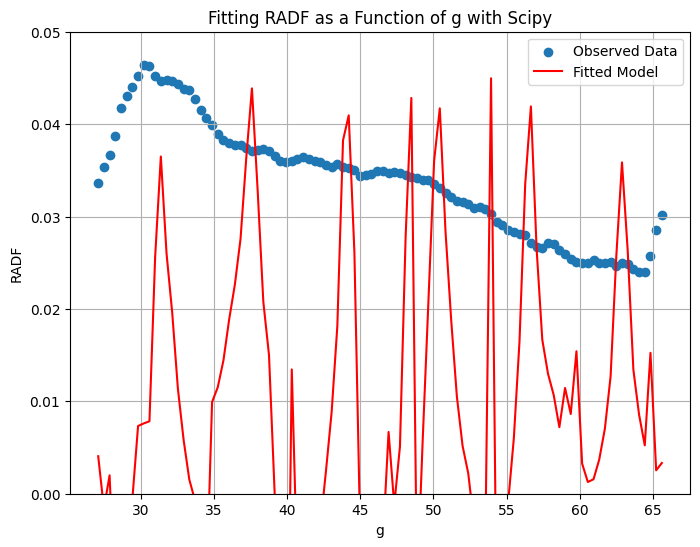

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Inside the functions where the warnings occur
# Inside the functions where the warnings occur
def p(g, b):
    term1 = np.nan_to_num((1 + c(g, b)) / (2 * (1 - b**2) * (1 - 2 * b * np.cos(g) + b**2)**(3/2)))
    term2 = np.nan_to_num((1 - c(g, b)) / (2 * (1 - b**2) * (1 + 2 * b * np.cos(g) + b**2)**(3/2)))
    return np.where(np.isfinite(term1 + term2), term1 + term2, 0)


def c(g, b):
    return 3.29 * np.exp(-17.4 * b**2) - 0.98

def Bs(g, hs):
    return 1 / (1 + np.tan(g/2)**2 / hs)

def M(i, e, w):
    return H(np.cos(i), w) * H(np.cos(e), w) - 1


def H(x, w):
    r0 = (1 - np.sqrt(np.clip(1 - w, 0, None))) / (1 + np.sqrt(np.clip(1 - w, 0, None)))
    return np.where(np.isfinite((1 - w * x*(r0 + ((1 - 2 * r0 * x)/2) * np.log((1 + x )/np.clip(x, np.finfo(float).eps, None))))**(-1)), 
                    np.nan_to_num((1 - w * x*(r0 + ((1 - 2 * r0 * x)/2) * np.log((1 + x )/np.clip(x, np.finfo(float).eps, None))))**(-1)), 0)


def RADF(params, i, e, g):
    w, b , hs, B_so = params
    mu = np.cos(e)
    mu0 = np.cos(i)
    return (w/4)* (mu0/(mu0 + mu)) * (p(g, b) * (1 + B_so*Bs(g, hs)) + M(i, e, w))

# Assuming phase_angles, binned_cosi, and binned_reflectance are defined appropriately

# Define your variables
g = phase_angles
g = np.array(g)
i = (np.arccos(binned_cosi) * 180) / np.pi
e = phase_angles - (np.arccos(binned_cosi) * 180) / np.pi
y_observed = binned_reflectance

# Fit the model to the data using curve_fit
fitted_params, covariance = curve_fit(lambda x, *params: RADF(params, *x), (i, e, g), y_observed, p0=[0.1, 0.1, 0.1, 0.1])

print(fitted_params)
# Plot the true data and the fitted model
plt.figure(figsize=(8, 6))
plt.scatter(g, y_observed, label='Observed Data')
plt.plot(g, RADF(fitted_params, i, e, g), color='red', label='Fitted Model')
plt.xlabel('g')
plt.ylabel('RADF')
plt.ylim(0,0.05)
plt.title('Fitting RADF as a Function of g with Scipy')
plt.legend()
plt.grid(True)
plt.show()


Gradient descent converged after 3 iterations.
Fitted Parameters: [ 3.41150158e+10 -7.34336217e+30  1.00000000e+00  1.00000000e+00]


/tmp/ipykernel_8822/823276044.py:8: RuntimeWarning: divide by zero encountered in divide
  term1 = np.nan_to_num((1 + c(g, b)) / (2 * (1 - b**2) * (1 - 2 * b * np.cos(g) + b**2)**(3/2)))
/tmp/ipykernel_8822/823276044.py:9: RuntimeWarning: divide by zero encountered in divide
  term2 = np.nan_to_num((1 - c(g, b)) / (2 * (1 - b**2) * (1 + 2 * b * np.cos(g) + b**2)**(3/2)))
/tmp/ipykernel_8822/823276044.py:10: RuntimeWarning: overflow encountered in add
  return np.where(np.isfinite(term1 + term2), term1 + term2, 0)


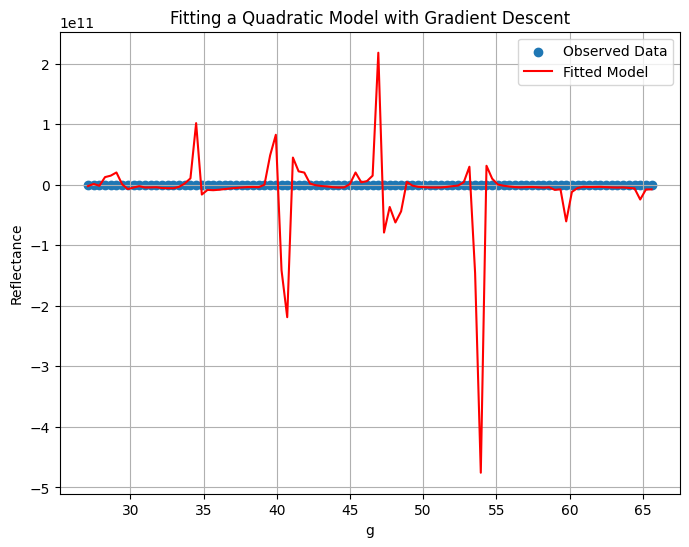

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model function to fit
def model(params, x):
    w, b , hs, B_so = params
    mu = np.cos(x[:, 1])  # Extract cos(e) from x
    mu0 = np.cos(x[:, 0])  # Extract cos(i) from x
    g = x[:, 2]  # Extract g from x
    return (w/4) * (mu0 / (mu0 + mu)) * (p(g, b) * (1 + B_so * Bs(g, hs)) + M(x[:, 0], x[:, 1], w))

# Define the objective function (chi-square)

def chi_square(params, x, y_observed):
    y_predicted = model(params, x)
    residuals = y_observed - y_predicted
    variance = np.var(y_observed)  # Compute the variance of the observed data
    return np.sum(residuals ** 2) / variance

def gradient_chi_square(params, x, y_observed):
    # Initialize an array to store the gradients
    gradient = np.zeros(len(params))
    
    # Compute the predicted y values using the model
    y_predicted = model(params,x)
    
    # Compute the residuals
    residuals = y_observed - y_predicted
    
    # Compute the gradient of chi-square with respect to each parameter
    for i in range(len(params)):
        # Perturb the parameter slightly
        params_perturbed = np.array(params)
        params_perturbed[i] += 1e-6
        
        # Compute the chi-square for the perturbed parameter
        chi_square_perturbed = chi_square(params_perturbed, x, y_observed)
        
        # Compute the partial derivative using finite differences
        gradient[i] = (chi_square_perturbed - chi_square(params, x, y_observed)) / 1e-6
    
    return gradient

def gradient_descent(grad_func, initial_params, max_iterations,x, y_observed, learning_rate=0.01, tolerance=1e-6):
    params = np.array(initial_params, dtype=float)  # Initialize parameters as float
    
    # Iterate until convergence or maximum iterations reached
    for i in range(max_iterations):
        # Compute the gradient of the cost function with respect to parameters
        gradient = grad_func(params, x, y_observed)
        
        # Update parameters using gradient descent
        params -= learning_rate * gradient
        
        # Check for convergence
        if np.linalg.norm(gradient) < tolerance:
            print(f"Gradient descent converged after {i+1} iterations.")
            break
    
    else:
        print("Gradient descent did not converge.")
    
    return params


# Define your variables
g = phase_angles
g = np.array(g)
i = (np.arccos(binned_cosi) * 180) / np.pi
e = phase_angles - (np.arccos(binned_cosi) * 180) / np.pi
y_observed = binned_reflectance

x = np.column_stack((i, e, g))

initial_params_guess = [1, 1, 1, 1]
fitted_params = gradient_descent(gradient_chi_square, initial_params_guess, 10000, x, y_observed)

# Print the fitted parameters
print("Fitted Parameters:", fitted_params)

# Plot the observed data and the fitted model
plt.figure(figsize=(8, 6))
plt.scatter(g, y_observed, label='Observed Data')
plt.plot(g, model(fitted_params, x), color='red', label='Fitted Model')
plt.xlabel('g')
plt.ylabel('Reflectance')
plt.title('Fitting a Quadratic Model with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


# Binning using the spectres module

In [2]:
from spectres import spectres
for i in range(304):
    phase_binned = np.linspace(np.min(angles_phase[:,i,0]),np.max(angles_phase[:,i,0]),100)
    binned_data = spectres(phase_binned, angles_phase[:,i,0], data1[:,i,50])
    plt.scatter(phase_binned,binned_data)


NameError: name 'angles_phase' is not defined